In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.feather as feather
import math

### Loading the Training Data Set

In [2]:
df = pd.read_feather(r"C:\PC_Data\DBDA\Project\FTR Dataset\train_data.ftr")

In [3]:
df.head()

customer_ID         S_2       P_2  \
0  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-03-09  0.938477   
1  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-04-07  0.936523   
2  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-05-28  0.954102   
3  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-06-13  0.960449   
4  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-07-16  0.947266   

       D_39       B_1       B_2       R_1       S_3      D_41       B_3  ...  \
0  0.001734  0.008728  1.006836  0.009224  0.124023  0.008774  0.004707  ...   
1  0.005775  0.004925  1.000977  0.006153  0.126709  0.000798  0.002714  ...   
2  0.091492  0.021652  1.009766  0.006817  0.123962  0.007599  0.009422  ...   
3  0.002455  0.013687  1.002930  0.001372  0.117188  0.000685  0.005531  ...   
4  0.002483  0.015190  1.000977  0.007607  0.117310  0.004654  0.009308  ...   

   D_136  D_137  D_138     D_139     D_140     D_141  D_142     D_143  \
0    NaN    NaN    NaN  0.002426  0.003706  0.003819    NaN  0.000569   
1    NaN    NaN    NaN  0.003956  0.003166  0.005032    NaN  0.009575   
2    NaN    NaN    NaN  0.003269  0.007328  0.000427    NaN  0.003429   
3    NaN    NaN    NaN  0.006119  0.004517  0.003201    NaN  0.008423   
4    NaN    NaN    NaN  0.003672  0.004944  0.008888    NaN  0.001670   

      D_144     D_145  
0  0.000610  0.002674  
1  0.005493  0.009216  
2  0.006985  0.002604  
3  0.006527  0.009598  
4  0.008125  0.009827  

[5 rows x 190 columns]

### Loading the Training Labels(Target Column) for Training Data 

In [26]:
labels = pd.read_feather(r"C:\PC_Data\DBDA\Project\labels_data.ftr")

In [5]:
labels.head()

customer_ID  target
0  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...       0
1  00000fd6641609c6ece5454664794f0340ad84dddce9a2...       0
2  00001b22f846c82c51f6e3958ccd81970162bae8b007e8...       0
3  000041bdba6ecadd89a52d11886e8eaaec9325906c9723...       0
4  00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...       0

## Training Labels Data Exploration

In [6]:
# Shape of the training labels data set

print(f"The training labels data includes {labels.shape[0]} rows and {labels.shape[1]} columns\n\nWith Data type as\n{labels.dtypes}")

The training labels data includes 458913 rows and 2 columns

With Data type as
customer_ID    object
target          int64
dtype: object


In [7]:
#Identifying the Null/Missing Values

null=round((labels.isna().sum()/labels.shape[0]*100),2).sort_values(ascending=False).astype(str)+('%')
null=null.to_frame().rename(columns={0:'Missing %'})
null.head()

Missing %
customer_ID      0.0%
target           0.0%

In [8]:
#Identifying the Unique Values

print(f"The training labels data includes {labels.nunique()[0]} unique values based on Customer_ID")

The training labels data includes 458913 unique values based on Customer_ID


### From the shape of the data set and unique values, it can be inferred that labels data has no duplicated values.

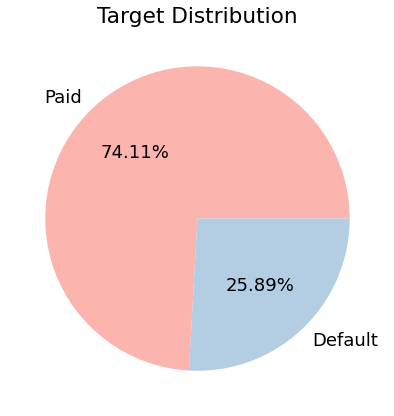

In [10]:
#Target Variable Distribution

target=labels['target'].value_counts(normalize=True)
target.rename(index={1:'Default',0:'Paid'},inplace=True)
palette_color = sns.color_palette('Pastel1')

plt.figure(figsize=(7,7))
plt.pie(x=target*100, labels=target.index, colors=palette_color, autopct='%.02f%%')
plt.title("Target Distribution")
plt.rcParams.update({'font.size': 24})
plt.show()

## Training Data Exploration

In [11]:
# Shape of the training data set

print(f"The training data includes {df.shape[0]} rows and {df.shape[1]} columns")

The training data includes 5531451 rows and 190 columns


In [12]:
# Identifying Columns and DataTypes

print("The training data consists of following columns and associated Data Types as")
print(df.info(max_cols=200, show_counts=False))

The training data consists of following columns and associated Data Types as
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5531451 entries, 0 to 5531450
Data columns (total 190 columns):
 #    Column       Dtype   
---   ------       -----   
 0    customer_ID  object  
 1    S_2          object  
 2    P_2          float16 
 3    D_39         float16 
 4    B_1          float16 
 5    B_2          float16 
 6    R_1          float16 
 7    S_3          float16 
 8    D_41         float16 
 9    B_3          float16 
 10   D_42         float16 
 11   D_43         float16 
 12   D_44         float16 
 13   B_4          float16 
 14   D_45         float16 
 15   B_5          float16 
 16   R_2          float16 
 17   D_46         float16 
 18   D_47         float16 
 19   D_48         float16 
 20   D_49         float16 
 21   B_6          float16 
 22   B_7          float16 
 23   B_8          float16 
 24   D_50         float16 
 25   D_51         float16 
 26   B_9          float1

In [13]:
#Identifying the Null/Missing Values

null_train=round((df.isna().sum()/df.shape[0]*100),2).sort_values(ascending=False).astype(str)+('%')
null_train=null_train.to_frame().rename(columns={0:'Missing %'})
null_train.head(26)

Missing %
D_87     99.93%
D_88     99.89%
D_108    99.48%
D_110    99.43%
D_111    99.43%
B_39     99.39%
D_73     98.99%
B_42     98.71%
D_138    96.48%
D_134    96.48%
D_135    96.48%
D_136    96.48%
D_137    96.48%
R_9      94.35%
B_29      93.1%
D_106    90.21%
D_132    90.19%
D_49     90.14%
R_26     88.98%
D_76     88.75%
D_66     88.73%
D_42     85.69%
D_142    82.93%
D_53     73.84%
D_82     73.37%
D_50     56.81%

In [14]:
#Identifying the Unique Values

print(f"The training data includes {df.nunique()[0]} unique values based on Customer_ID\n")

The training data includes 458913 unique values based on Customer_ID



In [15]:
# Identifying the Span of Data

print(f"The training data begins on {df['S_2'].min()} and ends on {df['S_2'].max()}")

The training data begins on 2017-03-01 and ends on 2018-03-31


### From the shape of Data set and No. of unique values in Training Data, it can be inferred that Single Customer_ID has multiples instances, which could be the statements for each month as observed from the span of data i.e. 13 months.

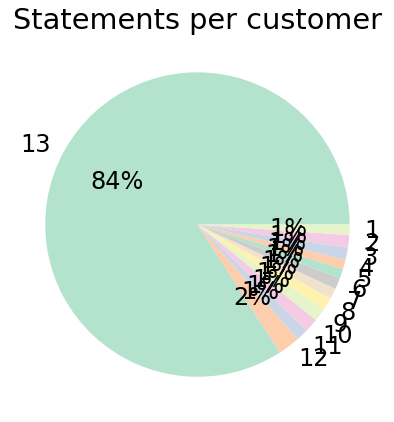

In [16]:
#Lets confirm the above inference

stm_count = df.customer_ID.value_counts().value_counts().sort_index(ascending=False).rename('Statements per customer')
palette_color = sns.color_palette('Pastel2')

plt.figure(figsize=(7,7))
plt.pie(x=stm_count, labels=stm_count.index, colors=palette_color, autopct='%.0f%%')
plt.title("Statements per customer")
plt.rcParams.update({'font.size': 18})
plt.show()

### From the above chart, we see that about 84% of the customers have 13 statements, whereas the other 16 % of the customers have statements ranging from 1 to 12. Hence, it can be concluded that multiple instance inference is true.

In [17]:
# Joining the train data with train labels to get the target variable in training data set

train_df = pd.merge(df, labels, on='customer_ID')

In [18]:
train_df.columns

Index(['customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41',
       'B_3',
       ...
       'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143', 'D_144',
       'D_145', 'target'],
      dtype='object', length=191)

## The dataset features are categorized into following 5 categories:

### S_* - Spend Variables
### P_* - Payment Variables
### D_* - Deliquency Variables
### R_* - Risk Variables
### B_* - Balance Variables

In [19]:
# Identifying Correlation between Payement Variables

p_cols=[col for col in train_df.columns if (col.startswith(('P', 't')))]
payment_df=train_df[p_cols]

corr=payment_df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .format(precision=2))

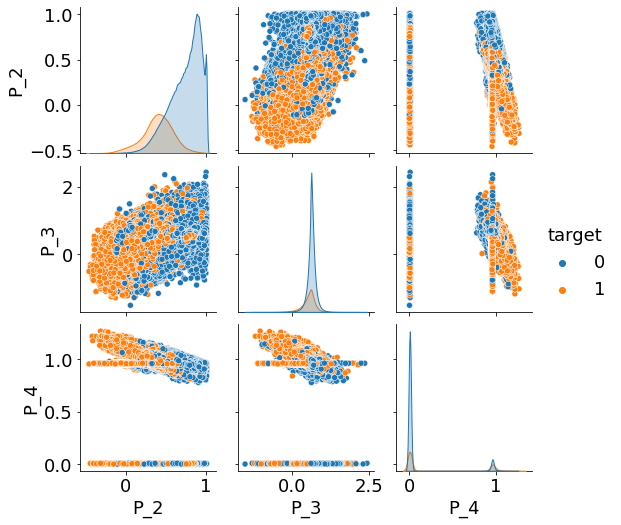

In [20]:
# Plotting the pair plot for Payment Variables Against Target

sns.pairplot(payment_df, hue='target')

In [11]:
# Identifying Correlation between Spend Variables

s_cols=[col for col in train_df.columns if (col.startswith(('S', 't')) & (col != "S_2"))]
spend_df=train_df[s_cols]

corr=spend_df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .format(precision=2))

In [11]:
# Identifying Correlation between Risk Variables

r_cols=[col for col in train_df.columns if (col.startswith(('R', 't')))]
risk_df=train_df[r_cols]

corr=risk_df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .format(precision=2))

In [12]:
# Identifying Correlation between Balance Variables

b_cols=[col for col in train_df.columns if (col.startswith(('B', 't')))]
balance_df=train_df[b_cols]

corr=balance_df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .format(precision=2))

In [13]:
# Identifying Correlation between All the Variables

all_cols=[col for col in train_df.columns if (col.startswith(('S', 'P')) & (col != "S_2"))]
var_df=train_df[all_cols]

corr=var_df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .format(precision=2))

## The Above co-relation plots were plotted to check the inter-dependent features with co-linearity greater than 0.9. The same inference will be the deciding factor for use of PCA in Data Pre-processing stage.

In [21]:
# Removing the above dataframe for memory optimization

del df, train_df

# Loading Sample DataSet

### Sample is taken considering the size of data set which would overwhelm the local system during ML Model Training. Below EDA is performed to check if sample dataset has the same inference as population dataset.

In [3]:
df_samp = pd.read_feather(r"C:\PC_Data\DBDA\Project\seq_train_data.ftr")

In [4]:
df_samp.head()

customer_ID         S_2       P_2  \
0  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-03-09  0.938469   
1  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-04-07  0.936665   
2  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-05-28  0.954180   
3  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-06-13  0.960384   
4  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-07-16  0.947248   

       D_39       B_1       B_2       R_1       S_3      D_41       B_3  ...  \
0  0.001733  0.008724  1.006838  0.009228  0.124035  0.008771  0.004709  ...   
1  0.005775  0.004923  1.000653  0.006151  0.126750  0.000798  0.002714  ...   
2  0.091505  0.021655  1.009672  0.006815  0.123977  0.007598  0.009423  ...   
3  0.002455  0.013683  1.002700  0.001373  0.117169  0.000685  0.005531  ...   
4  0.002483  0.015193  1.000727  0.007605  0.117325  0.004653  0.009312  ...   

   D_136  D_137  D_138     D_139     D_140     D_141  D_142     D_143  \
0    NaN    NaN    NaN  0.002427  0.003706  0.003818    NaN  0.000569   
1    NaN    NaN    NaN  0.003954  0.003167  0.005032    NaN  0.009576   
2    NaN    NaN    NaN  0.003269  0.007329  0.000427    NaN  0.003429   
3    NaN    NaN    NaN  0.006117  0.004516  0.003200    NaN  0.008419   
4    NaN    NaN    NaN  0.003671  0.004946  0.008889    NaN  0.001670   

      D_144     D_145  
0  0.000610  0.002674  
1  0.005492  0.009217  
2  0.006986  0.002603  
3  0.006527  0.009600  
4  0.008126  0.009827  

[5 rows x 190 columns]

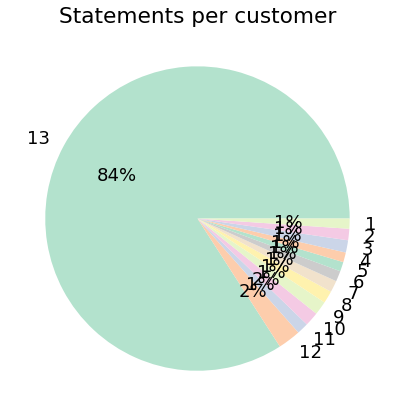

In [24]:
#Checking customers distribution of the sample

stm_count = df_samp.customer_ID.value_counts().value_counts().sort_index(ascending=False).rename('Statements per customer')
palette_color = sns.color_palette('Pastel2')

plt.figure(figsize=(7,7))
plt.pie(x=stm_count, labels=stm_count.index, colors=palette_color, autopct='%.0f%%')
plt.title("Statements per customer")
plt.rcParams.update({'font.size': 18})
plt.show()

## From the above pie chart, we can see that the sampled data has approximately same distribution on customerID

In [27]:
# Joining the train data with train labels to get the target variable in training data set

df_samp = pd.merge(df_samp, labels, on='customer_ID')

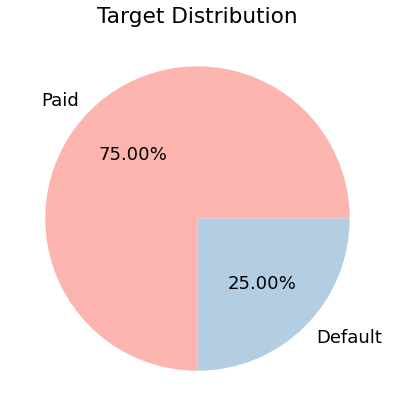

In [28]:
# Checking Target variable Distribution on sample data 
target=df_samp['target'].value_counts(normalize=True)
target.rename(index={1:'Default',0:'Paid'},inplace=True)
palette_color = sns.color_palette('Pastel1')

plt.figure(figsize=(7,7))
plt.pie(x=target*100, labels=target.index, colors=palette_color, autopct='%.02f%%')
plt.title("Target Distribution")
plt.rcParams.update({'font.size': 18})
plt.show()

## As seen from the above pie chart, target variable distribution is same as the original dataset and Hence we can conclude that the sample data follows the same inference as population data mainly considering the target column distribution and instance of each customer_id in the dataset.

In [29]:
#Identifying the Null/Missing Values on sample data

null_train=round((df_samp.isna().sum()/df_samp.shape[0]*100),2).sort_values(ascending=False).astype(str)+('%')
null_train=null_train.to_frame().rename(columns={0:'Missing %'})
null_train.head(26)

Missing %
D_87     99.94%
D_88     99.88%
D_108    99.47%
D_111    99.38%
D_110    99.38%
B_39     99.34%
D_73     98.99%
B_42     98.77%
D_138    96.48%
D_136    96.48%
D_137    96.48%
D_134    96.48%
D_135    96.48%
R_9      94.24%
B_29     92.99%
D_106    90.16%
D_132    90.13%
D_49     90.08%
R_26     89.09%
D_76     88.84%
D_66     88.81%
D_42     85.53%
D_142     82.8%
D_53     73.88%
D_82     73.15%
D_50     56.74%

## The above 25 columns with more than 70% missing values should be removed during the data cleaning stage, since imputing missing data from available 25% data might influence the model training negatively. 

In [30]:
# Defining function to check nan count 
def nan_count(column):
    count_na = df_samp[column].isna().sum()/len(df_samp)
    return count_na

In [31]:
# Dropping columns having more than 70% nan values
for col in df_samp.columns:
    if nan_count(col) > 0.70:
       df_samp.drop([col], inplace = True, axis=1)

In [32]:
# changing datatypes of categorical columns from float to category
for col in ['D_63', 'D_64', 'D_68', 'B_30','B_38','D_114','D_116','D_117','D_120','D_126']:
    df_samp[col] = df_samp[col].astype('category')

In [33]:
# checking nan count on the remaining columns 
for col in df_samp.columns:
    print(col, df_samp[col].isna().sum())

customer_ID 0
S_2 0
P_2 4094
D_39 0
B_1 0
B_2 181
R_1 0
S_3 93007
D_41 181
B_3 181
D_43 149891
D_44 24926
B_4 0
D_45 181
B_5 0
R_2 0
D_46 109675
D_47 0
D_48 64781
B_6 15
B_7 0
B_8 2114
D_50 283708
D_51 0
B_9 0
R_3 0
D_52 2619
P_3 27254
B_10 0
S_5 0
B_11 0
S_6 0
D_54 181
R_4 0
S_7 93007
B_12 0
S_8 0
D_55 16848
D_56 271285
B_13 4435
R_5 0
D_58 0
S_9 265094
B_14 0
D_59 9557
D_60 0
D_61 53567
B_15 591
S_11 0
D_62 68285
D_63 0
D_64 19661
D_65 0
B_16 181
B_17 282688
B_18 0
B_19 181
B_20 181
D_68 19442
S_12 0
R_6 0
S_13 0
B_21 0
D_69 17423
B_22 181
D_70 8395
D_71 0
D_72 2073
S_15 0
B_23 0
P_4 0
D_74 1812
D_75 0
B_24 0
R_7 0
D_77 227981
B_25 591
B_26 181
D_78 24926
D_79 6622
R_8 0
S_16 0
D_80 1812
R_10 0
R_11 0
B_27 181
D_81 2311
S_17 0
R_12 3
B_28 0
R_13 0
D_83 17423
R_14 0
R_15 0
D_84 2619
R_16 0
B_30 181
S_18 0
D_86 0
R_17 0
R_18 0
B_31 0
S_19 0
R_19 0
B_32 0
S_20 0
R_20 8
R_21 0
B_33 181
D_89 2619
R_22 0
R_23 0
D_91 14091
D_92 0
D_93 0
D_94 0
R_24 0
R_25 0
D_96 0
S_22 1674
S_23 22
S_24 164

In [34]:
# imputing numerical columns with mean values
for col in df_samp.columns:
    if df_samp[col].dtypes=='float64':
        df_samp[col].fillna(df_samp[col].median(), inplace=True)

In [35]:
# imputing categorical columns with mode values
for col in ['D_64','D_68', 'B_30','B_38','D_114','D_116','D_117','D_120','D_126']:
    df_samp[col].fillna(df_samp[col].mode()[0], inplace=True)

In [36]:
# Checking nan count after imputing values
for col in df_samp.columns:
    print(col, df_samp[col].isna().sum())

customer_ID 0
S_2 0
P_2 0
D_39 0
B_1 0
B_2 0
R_1 0
S_3 0
D_41 0
B_3 0
D_43 0
D_44 0
B_4 0
D_45 0
B_5 0
R_2 0
D_46 0
D_47 0
D_48 0
B_6 0
B_7 0
B_8 0
D_50 0
D_51 0
B_9 0
R_3 0
D_52 0
P_3 0
B_10 0
S_5 0
B_11 0
S_6 0
D_54 0
R_4 0
S_7 0
B_12 0
S_8 0
D_55 0
D_56 0
B_13 0
R_5 0
D_58 0
S_9 0
B_14 0
D_59 0
D_60 0
D_61 0
B_15 0
S_11 0
D_62 0
D_63 0
D_64 0
D_65 0
B_16 0
B_17 0
B_18 0
B_19 0
B_20 0
D_68 0
S_12 0
R_6 0
S_13 0
B_21 0
D_69 0
B_22 0
D_70 0
D_71 0
D_72 0
S_15 0
B_23 0
P_4 0
D_74 0
D_75 0
B_24 0
R_7 0
D_77 0
B_25 0
B_26 0
D_78 0
D_79 0
R_8 0
S_16 0
D_80 0
R_10 0
R_11 0
B_27 0
D_81 0
S_17 0
R_12 0
B_28 0
R_13 0
D_83 0
R_14 0
R_15 0
D_84 0
R_16 0
B_30 0
S_18 0
D_86 0
R_17 0
R_18 0
B_31 0
S_19 0
R_19 0
B_32 0
S_20 0
R_20 0
R_21 0
B_33 0
D_89 0
R_22 0
R_23 0
D_91 0
D_92 0
D_93 0
D_94 0
R_24 0
R_25 0
D_96 0
S_22 0
S_23 0
S_24 0
S_25 0
S_26 0
D_102 0
D_103 0
D_104 0
D_105 0
D_107 0
B_36 0
B_37 0
R_27 0
B_38 0
D_109 0
D_112 0
B_40 0
S_27 0
D_113 0
D_114 0
D_115 0
D_116 0
D_117 0
D_118 0
D_119 

In [37]:
cat_col = ['D_63','D_64','D_68','B_30','B_38','D_114','D_116','D_117','D_120','D_126']

In [38]:
# plotting displot graph on each type of feature
def displot_var(letter, figsize):
    col_list=[]
    for c in df_samp.columns:
        if (c.startswith((letter,'t'))) & (c != "S_2") & (c not in cat_col):
                col_list.append(c)
                
    plot_cols = 4 # defining no of columns
    plot_rows = math.ceil((len(col_list) - 1)/plot_cols) # defining no of rows
    
    fig, axes = plt.subplots(plot_rows, plot_cols, figsize=figsize)
    for i, ax in enumerate(axes.reshape(-1)):
        if i<len(col_list)-1:
            sns.kdeplot(x=col_list[i], hue ='target', data=df_samp, fill=True,hue_order=[1,0], linewidth=2, 
                       ax=ax)
        ax.tick_params(left=False, bottom=False, labelsize=6)
        ax.xaxis.get_label().set_fontsize(10)
        ax.set_ylabel('')
            
    plt.suptitle('Distributions of {}_* Variables'.format(letter), fontsize=25)
    plt.tight_layout(rect=[0, 0.2, 1, 0.98])
    plt.show()

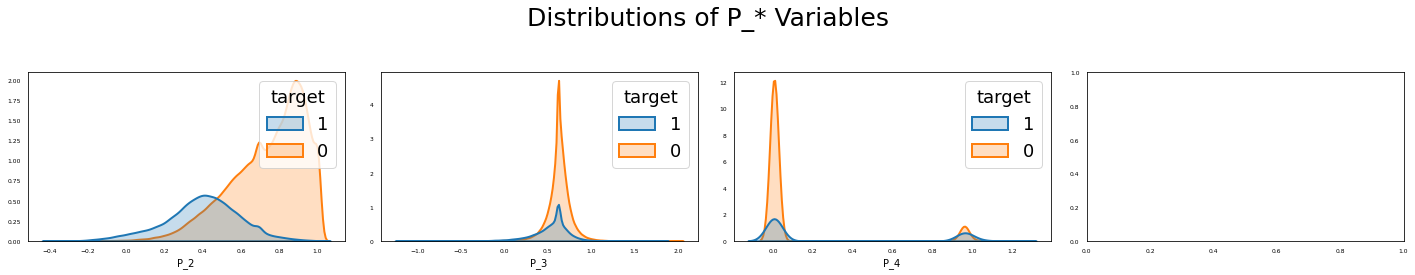

In [39]:
# Plots for 'P' features
displot_var('P', (20,5))

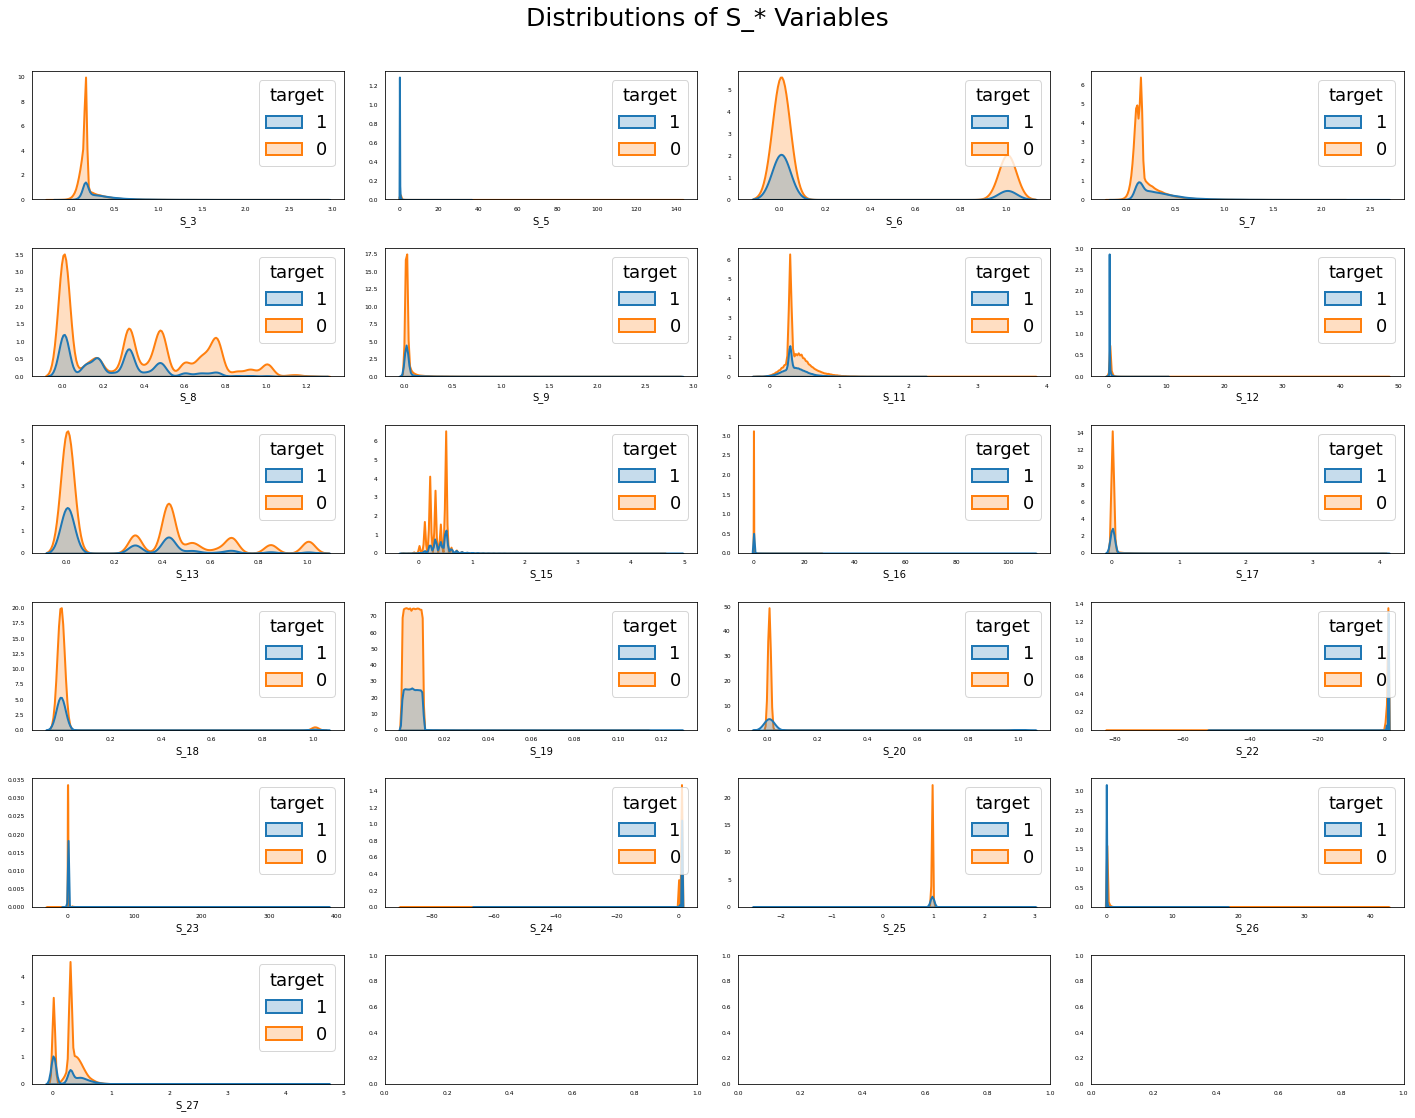

In [23]:
# Plots for 'S' features
displot_var('S', (20,20))

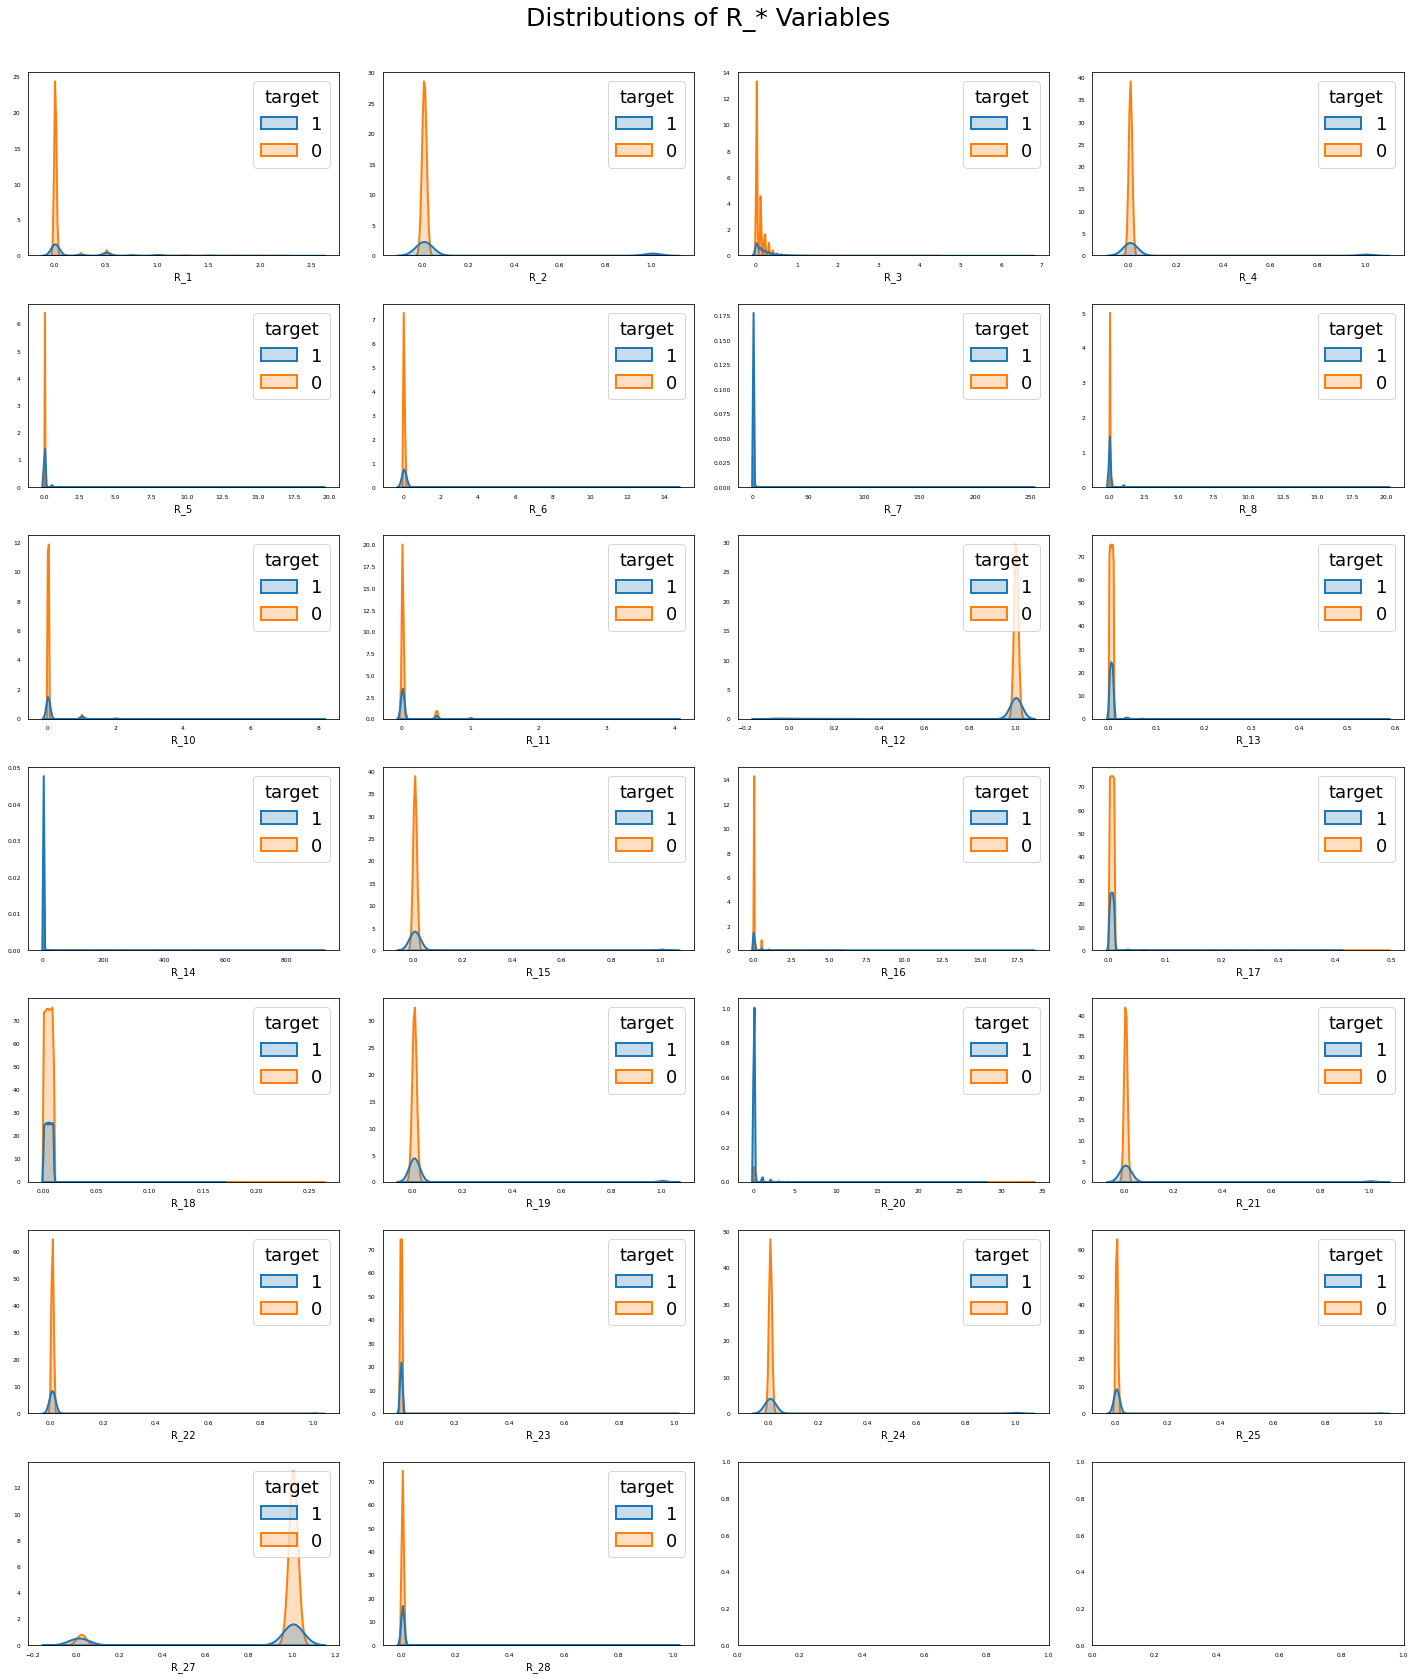

In [24]:
# Plots for 'R' features
displot_var('R',(20,30))

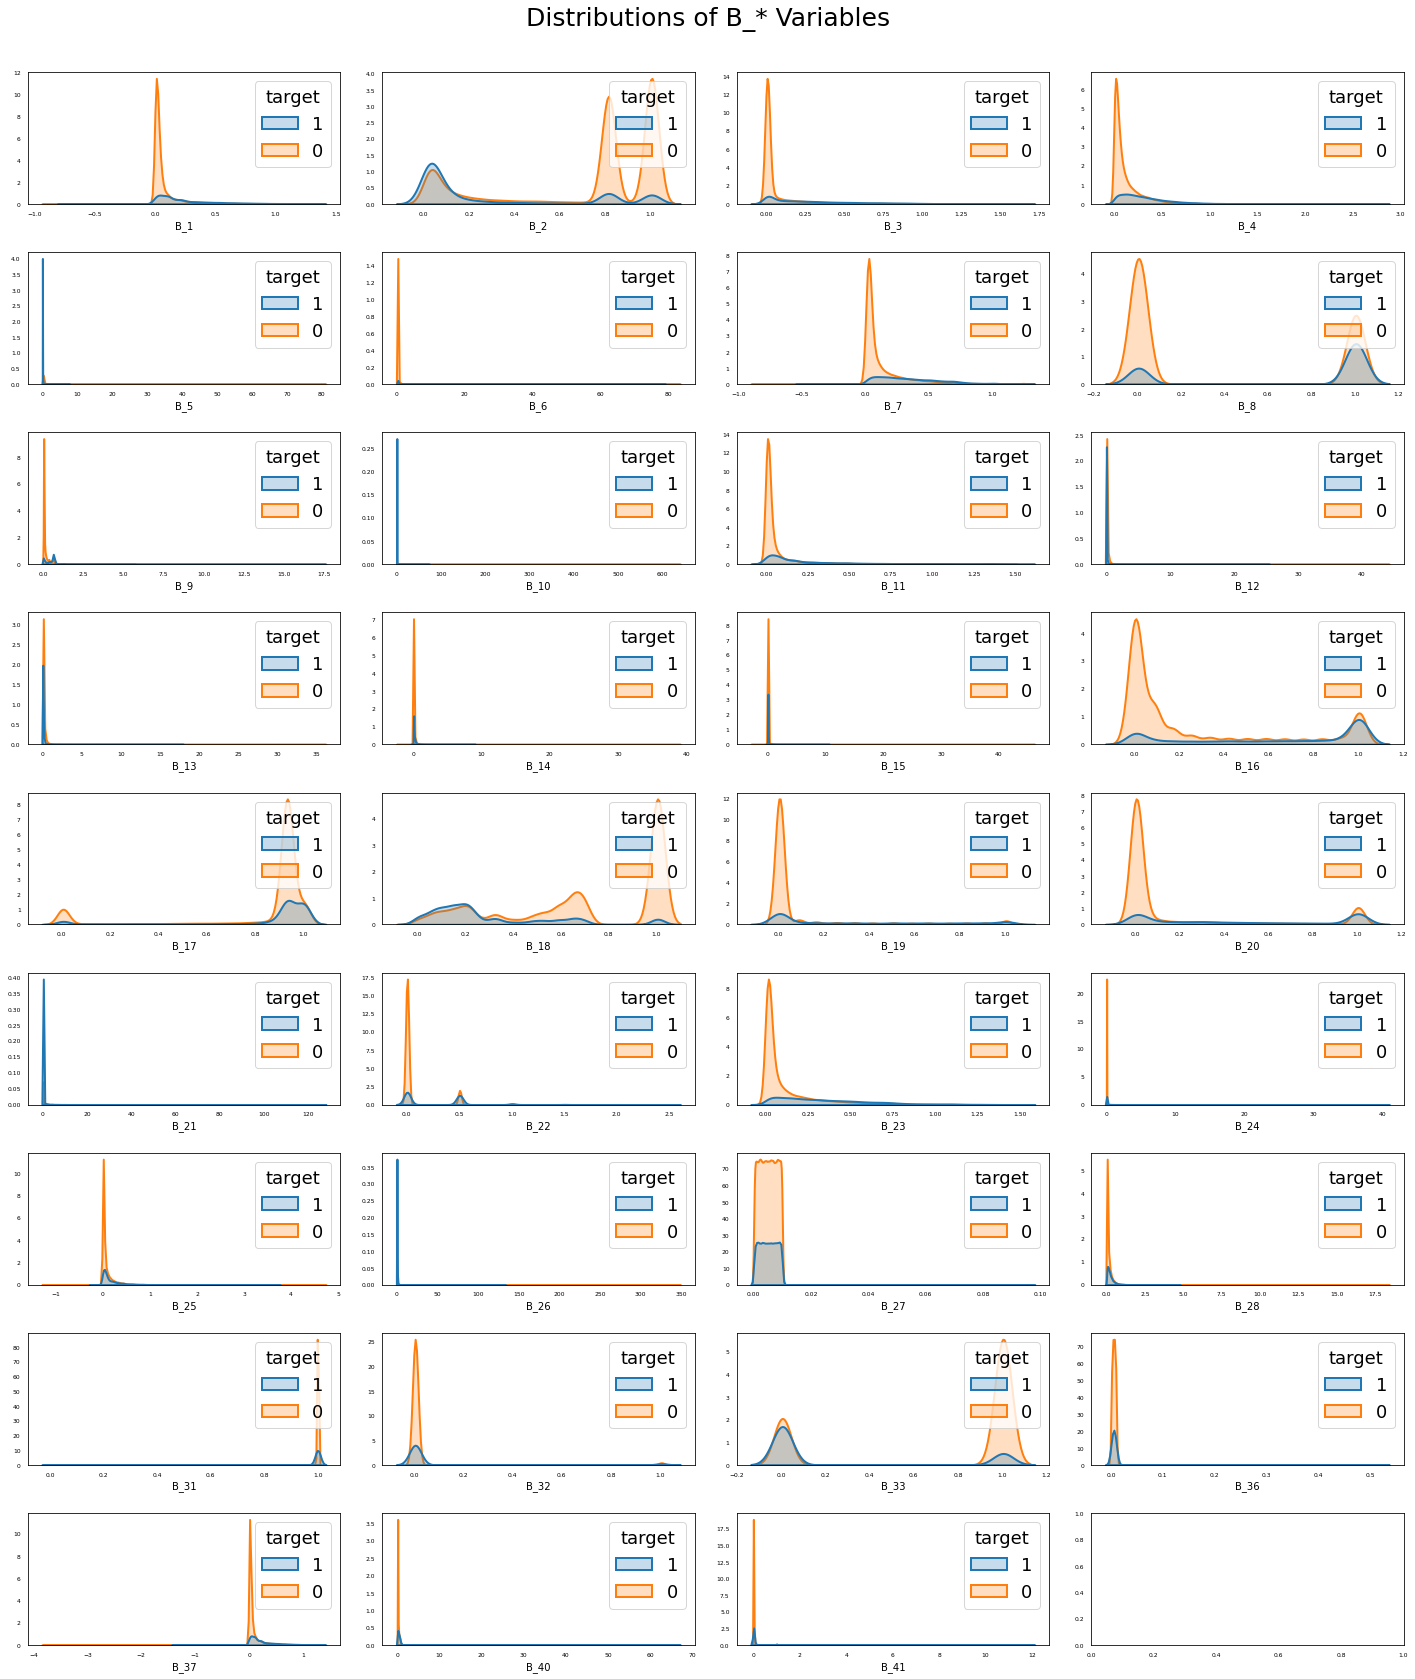

In [25]:
# Plots for 'B' features
displot_var('B',(20,30))

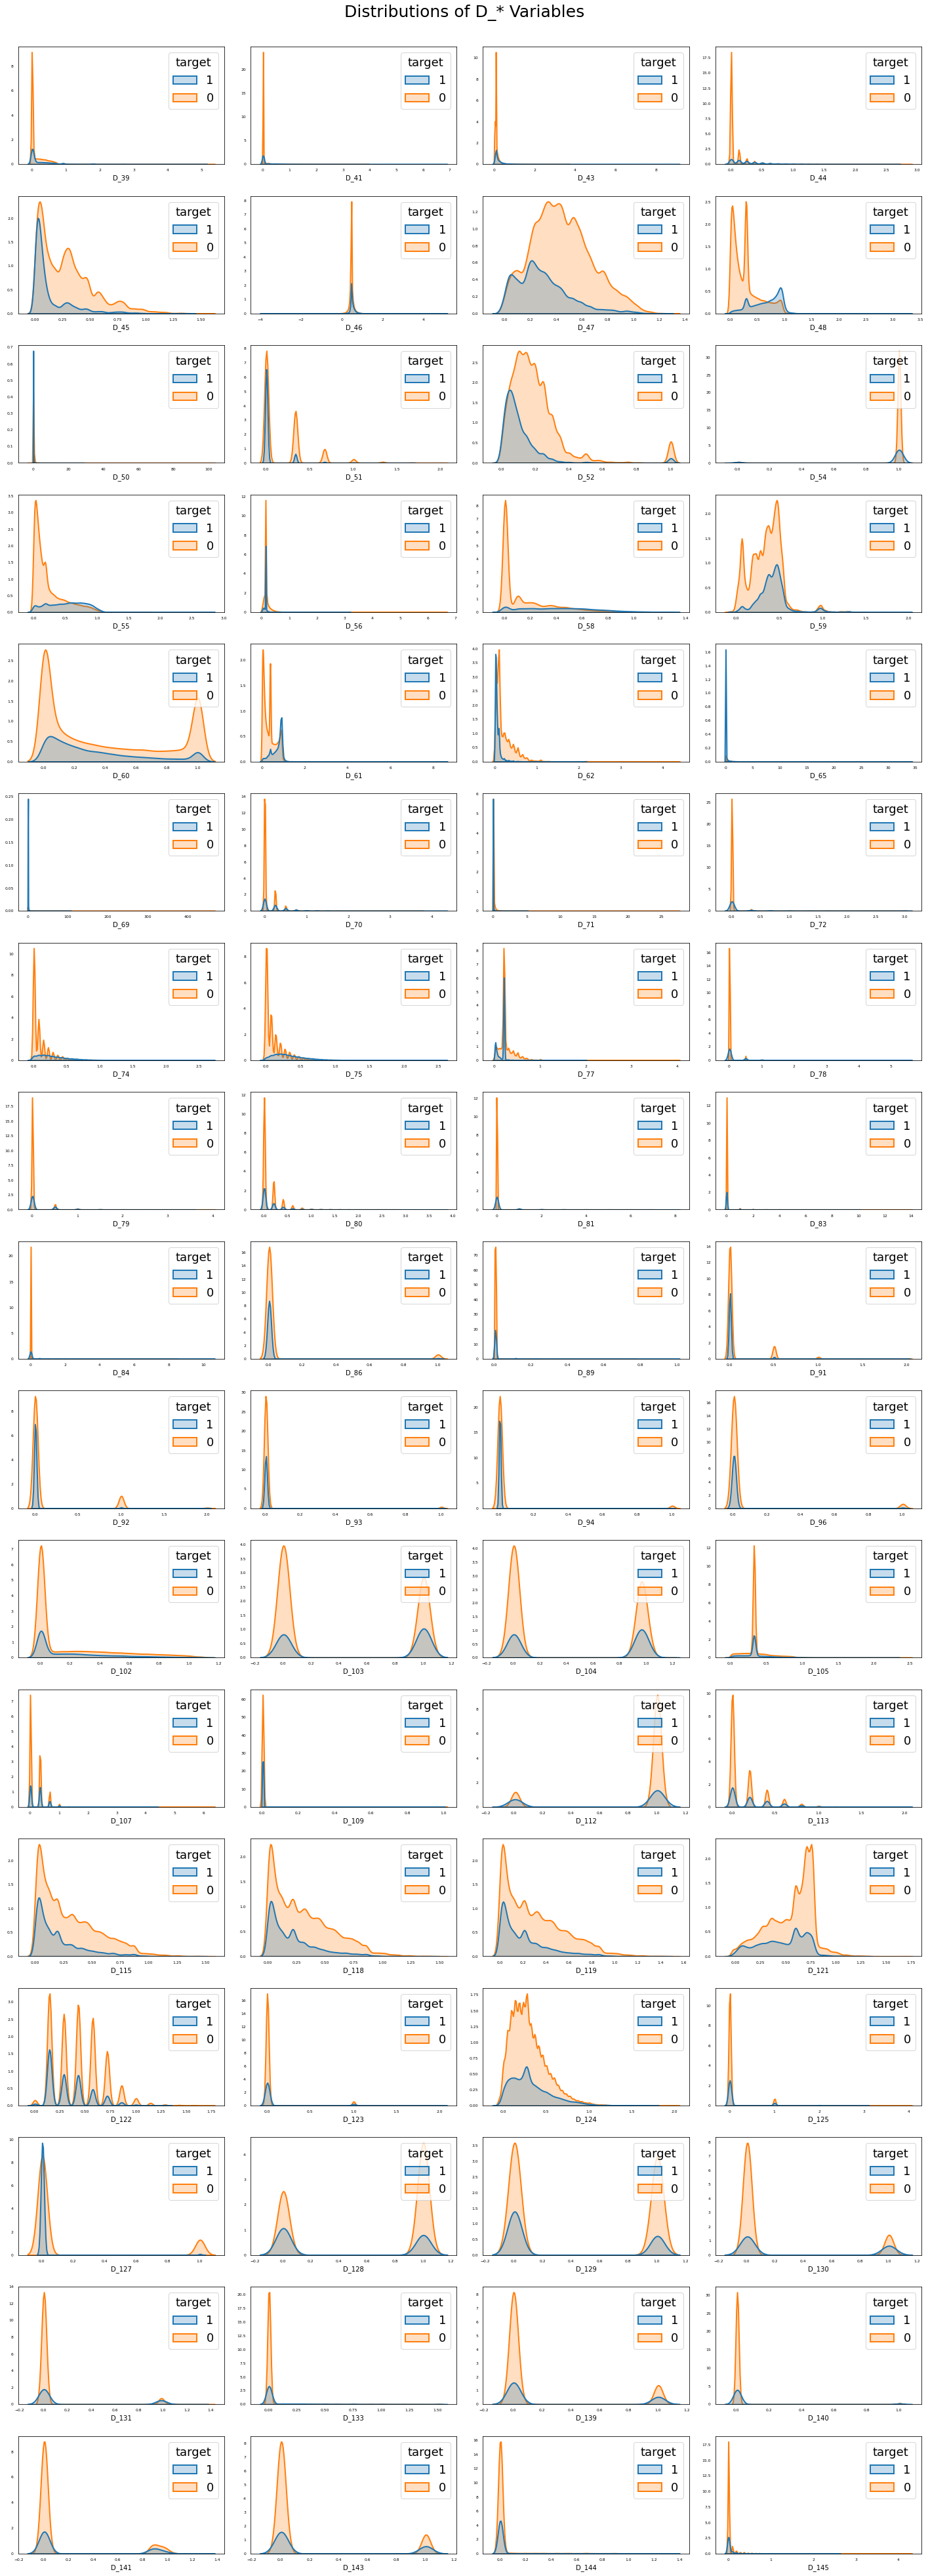

In [26]:
# Plots for 'D' features
displot_var('D',(20,70))

## The above density plot for various numerical features against the Target were plotted to check the influence the any particular variable on target, however with such scales data it cannot be infered. These particular plots can only help to understand the skeweness of the Data, which is majorly positive.

In [9]:
# Function to find correlation between same variable features
def corr_variable(letter, size):
    col_list=[]
    for c in df_samp.columns:
        if (c.startswith((letter))) & (c != "S_2"):
            col_list.append(c)
            
    cor = df_samp[col_list].corr()
    matrix = np.triu(cor)
    sns.set(rc = {'figure.figsize':size})       
    sns.heatmap(cor, annot=True, mask = matrix, cmap='coolwarm')

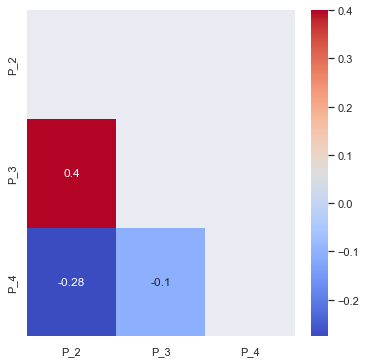

In [10]:
# Correlation between P variables
corr_variable('P',(6,6))

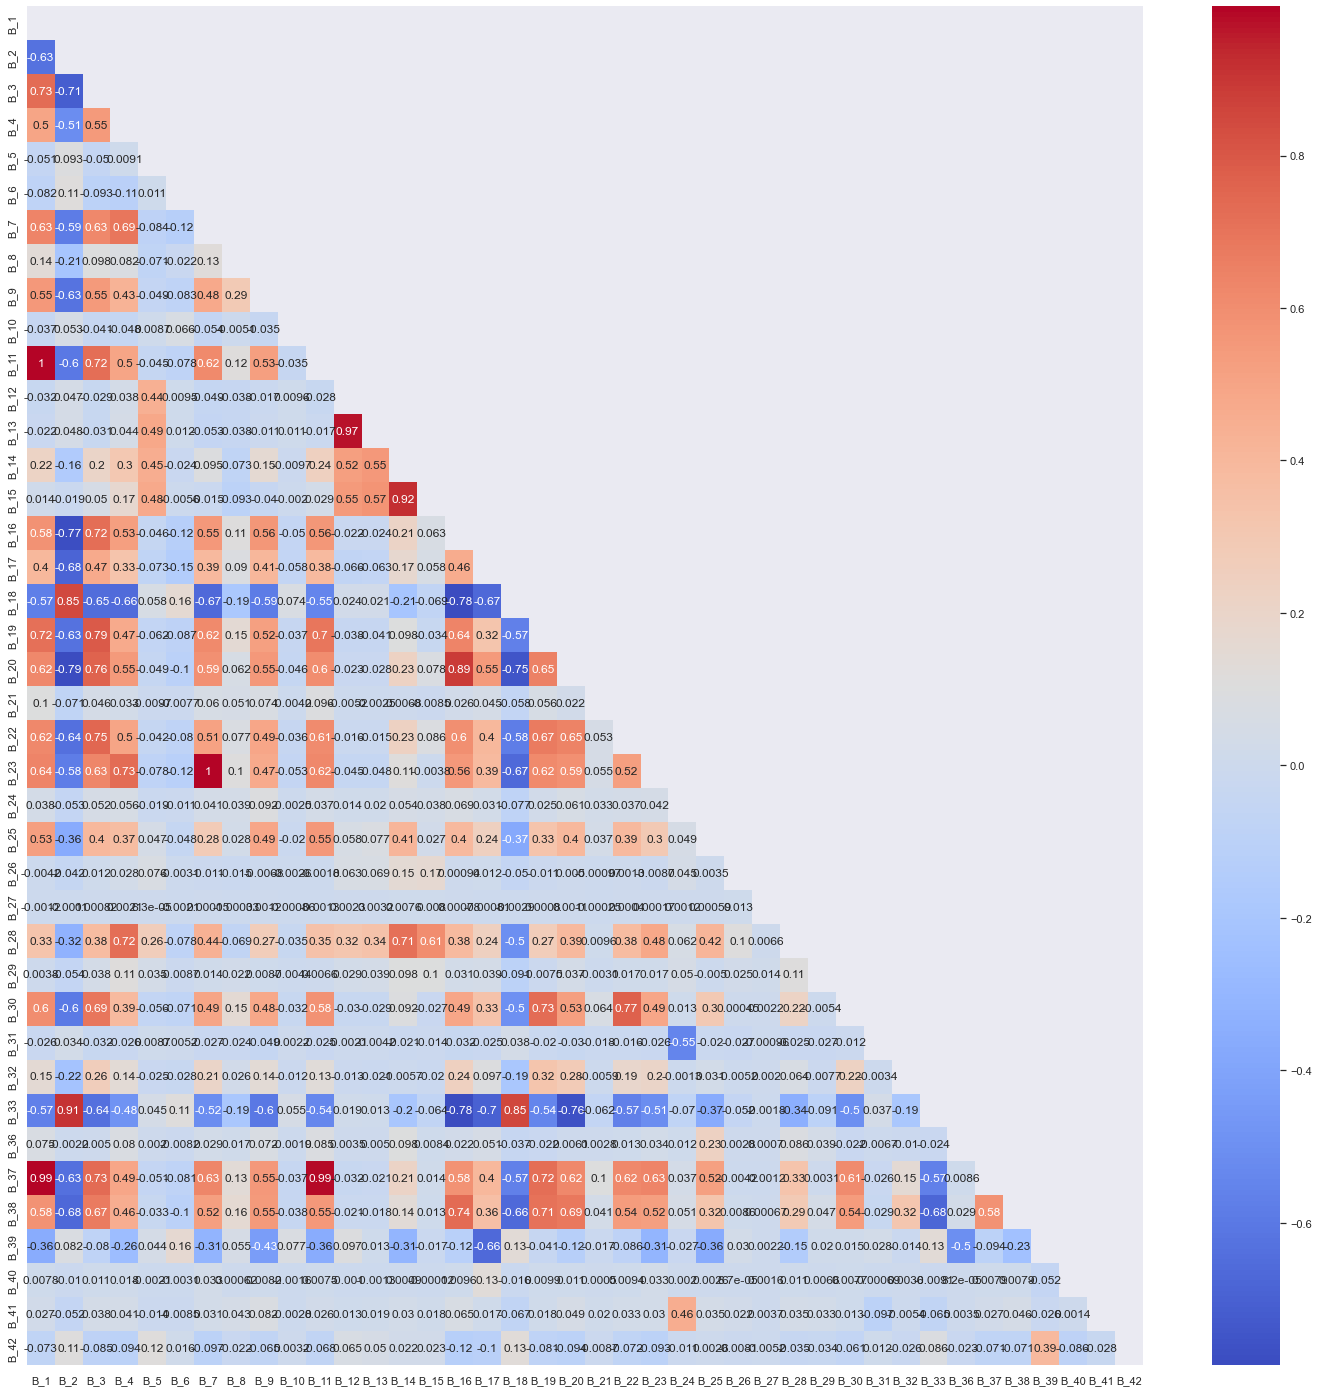

In [11]:
# Correlation between B variables
corr_variable('B',(25,25))

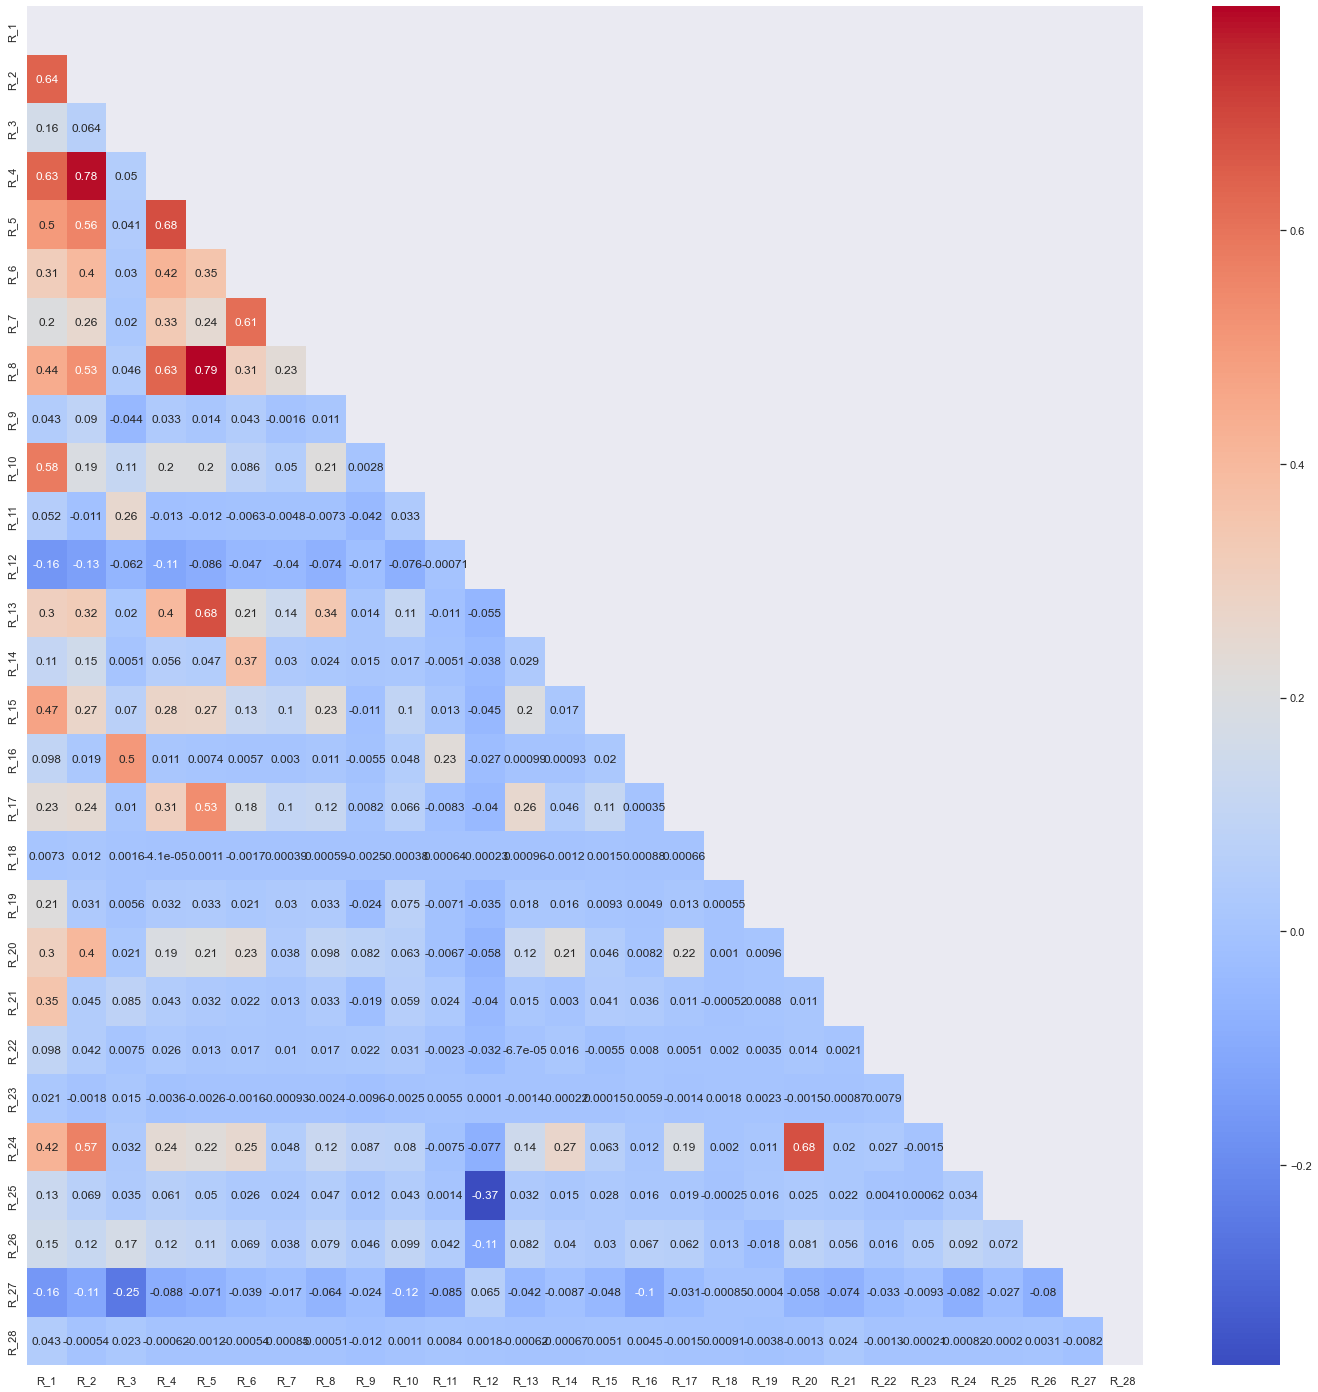

In [13]:
# Correlation between R variables
corr_variable('R',(25,25))

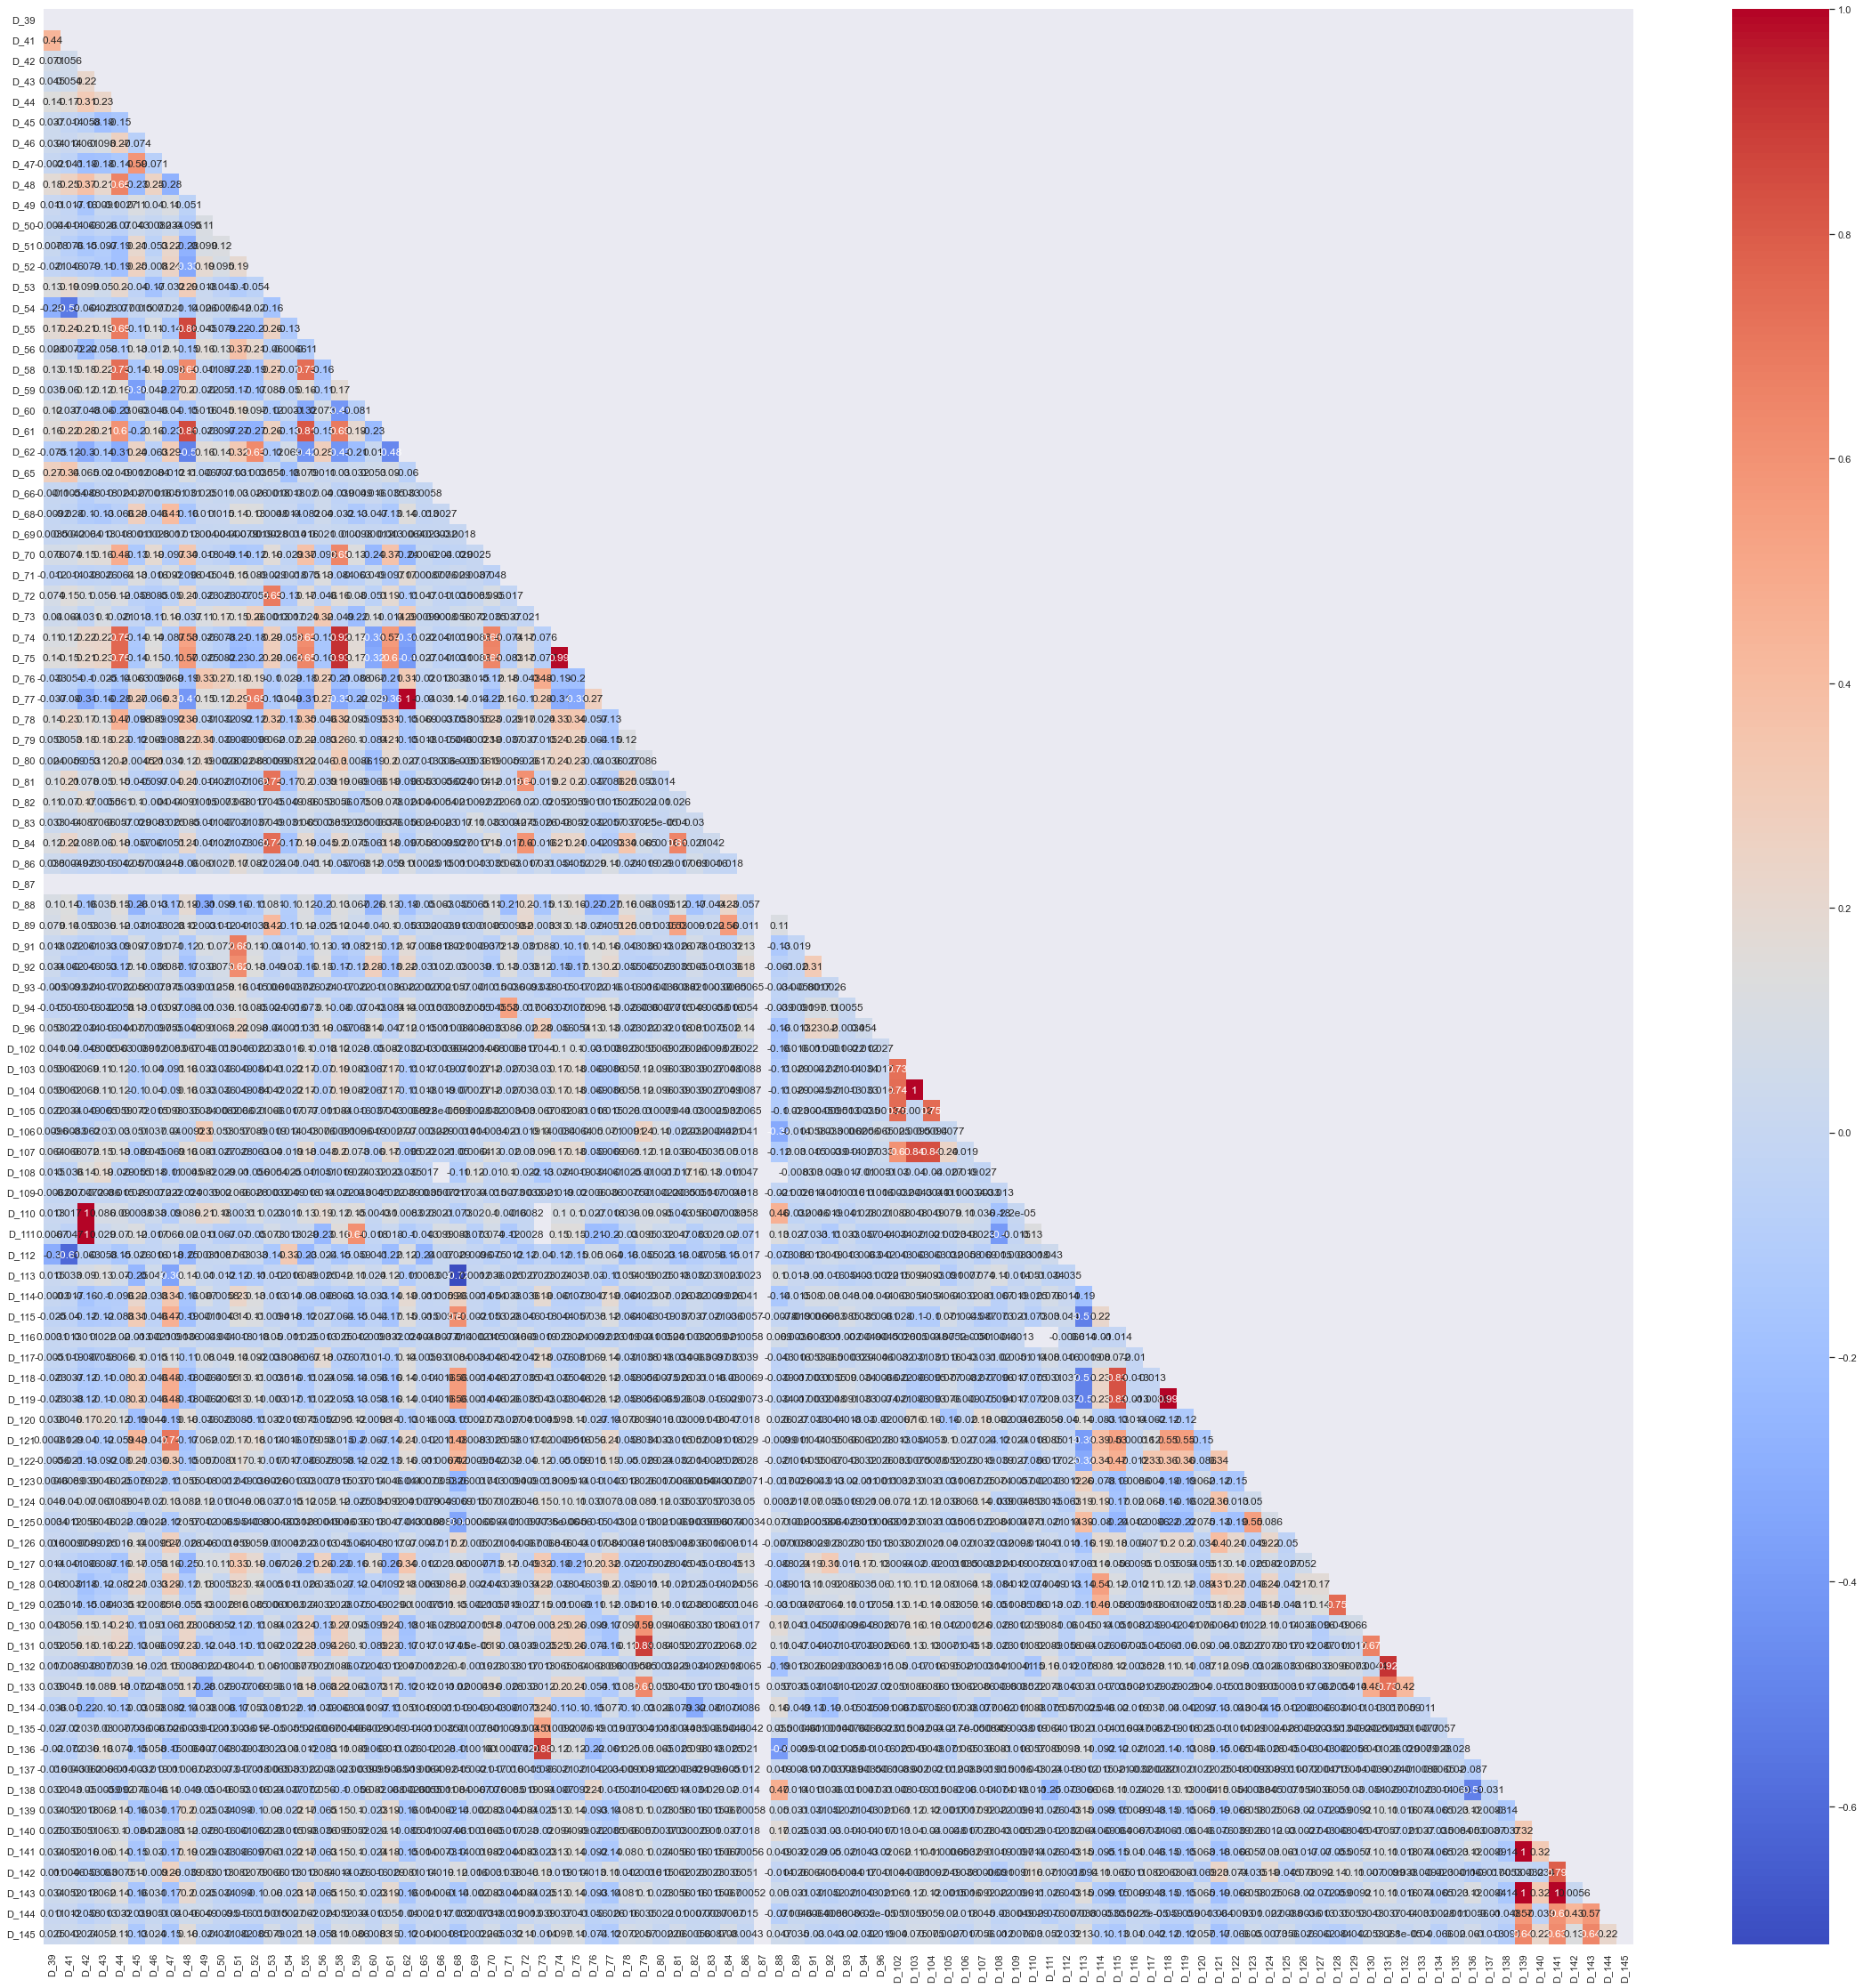

In [14]:
# Correlation between D variables
corr_variable('D',(40,40)) 

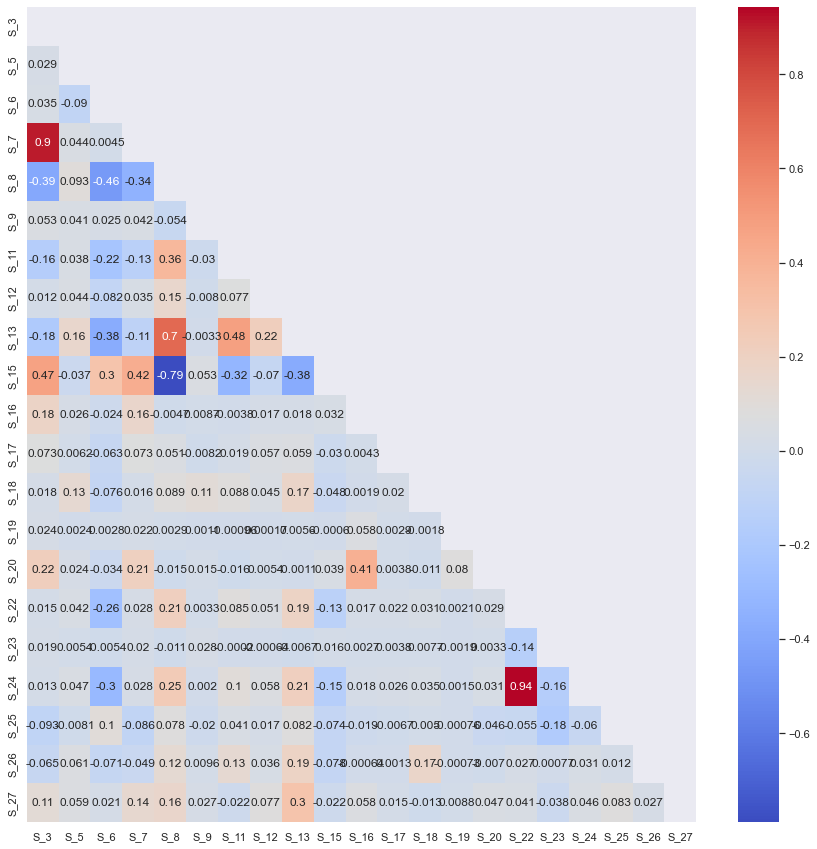

In [12]:
# Correlation between S variables    
corr_variable('S',(15,15))

## The above co-relation plots are plotted to identify the highly co-related/inter-dependent features thereby assisting the decision of dimentionality reduction.